<center><h1><strong>Tarea 2 - Máquinas de Aprendizaje</strong></h1></center>
<center><h3> Juan Pablo Castillo Vera &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 201204595-9 </h3></center>
<center><h3> Álvaro Rodrigo Rojas Valenzuela &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 201073555-9</h3></center>



## 1. Introducción

En la siguiente tarea se realizará un estudio de 
 
1. Implementación y evaluación de clasificadores en sklearn.
2. Clasificadores bayesianos ingenuos (Bernoulli, Multinomial).
3. LDA versus QDA.Reducción de dimensionalidad para clasificación.
4. Regresión Logística. Selección de híper-parámetros estructurales.
5. SVMs Lineales. Selección de híper-parámetros estructurales.
6. Representación vectorial de texto.
7. Procesamiento de lenguaje natural.


## 2. Desarrollo

## 2.1 Reducción de Dimensionalidad para Clasificación

En esta sección se trabajará con una colección de sonidos fonéticos que deben ser identificados con vocales del inglés británico. Los datos han sido representados en un espacio de d = 10 características. Existen 528 datos de entrenamiento y 462 de pruebas, que pueden ser descargados
desde el sitio web mantenido por los autores de nuestro texto guía. El mejor desempeño reportado por los autores corresponde a un 56% de accuracy, y es alcanzado por un modelo de vecinos más cercanos y una red neuronal artificial de radio basal.

Para esto se realizaron los siguientes pasos:
### 2.1.a. Construir un dataframe de los datos a analizar.

In [1]:
# REDUCCIÓN DE DIMENSIONALIDAD PARA CLASIFICACIÓN
# 1.a
import urllib
import pandas as pd
train_data_url = "http://statweb.stanford.edu/~tibs/ElemStatLearn/datasets/vowel.train"
test_data_url = "http://statweb.stanford.edu/~tibs/ElemStatLearn/datasets/vowel.test"
train_data_f = urllib.urlretrieve(train_data_url, "train_data.csv")
test_data_f = urllib.urlretrieve(test_data_url, "test_data.csv")
train_df = pd.DataFrame.from_csv('train_data.csv',header=0,index_col=0)
test_df = pd.DataFrame.from_csv('test_data.csv',header=0,index_col=0)

Ùltimos datos de entrenamiento y el promedio de sus atributos.

In [2]:
train_df.tail()

,y,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10
row.names,,,,,,,,,,,
524,7,-4.065,2.876,-0.856,-0.221,-0.533,0.232,0.855,0.633,-1.452,0.272
525,8,-4.513,4.265,-1.477,-1.090,0.215,0.829,0.342,0.693,-0.601,-0.056
526,9,-4.651,4.246,-0.823,-0.831,0.666,0.546,-0.300,0.094,-1.343,0.185
527,10,-5.034,4.993,-1.633,-0.285,0.398,0.181,-0.211,-0.508,-0.283,0.304
528,11,-4.261,1.827,-0.482,-0.194,0.731,0.354,-0.478,0.050,-0.112,0.321


In [3]:
train_df.mean()

y       6.000000
x.1    -3.166695
x.2     1.735343
x.3    -0.448002
x.4     0.524983
x.5    -0.389280
x.6     0.584960
x.7     0.017477
x.8     0.417394
x.9    -0.268112
x.10   -0.084568
dtype: float64

Últimos datos de prueba y el promedio de sus atributos.

In [4]:
test_df.tail()

,y,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10
row.names,,,,,,,,,,,
458,7,-3.239,3.083,-1.427,-0.202,-0.282,1.421,0.576,0.068,-0.914,0.147
459,8,-3.753,3.605,-0.899,-0.747,-0.401,1.765,0.620,0.754,-0.835,-0.301
460,9,-3.980,2.459,0.068,0.023,0.237,1.029,-0.189,0.521,-0.773,-0.500
461,10,-4.264,2.925,0.065,0.794,0.323,0.515,-1.282,-0.140,-0.863,-0.390
462,11,-3.291,2.324,-0.679,0.285,0.441,0.557,-0.227,0.115,-1.046,0.697


In [5]:
test_df.mean()

y       6.000000
x.1    -3.246078
x.2     2.049102
x.3    -0.576076
x.4     0.504626
x.5    -0.210089
x.6     0.681998
x.7    -0.029327
x.8     0.244162
x.9    -0.342820
x.10   -0.056221
dtype: float64

Como se observa en las tablas, y se mencionó anteriormente, existen 528 datos de entrenamiento y 462 de prueba. Cada dato posee 10 atributos relacionados con el sonido producido al decir la vocal en cuestión. También observando los valores posibles de y, se obtiene que existen 11 tipos de vocales.

Además se puede observa de los promedios, que los valores están bastante cercanos entre si.

De una investigación adicional, se obtuvo que los experimentos constaron de hacer repetir a una persona 6 veces cada vocal, y así para 15 personas. Con lo que se obstuvieron un total de 990 datos (6x15x11). Estos datos se separaron en forma consistente entre 48x11 para training set y 42x11 de testing set.

### 2.1.b. Construcción de matrices con las características y etiquetas de los datos de training y test.

In [6]:
# 1.b
from sklearn.preprocessing import StandardScaler
X = train_df.ix[:,'x.1':'x.10'].values
y = train_df.ix[:,'y'].values
X_std = StandardScaler().fit_transform(X)

En el código anterior se etiquetan las columnas y se normalizan los datos para poder trabajar con ellos.

### 2.1.c. Representación con PCA

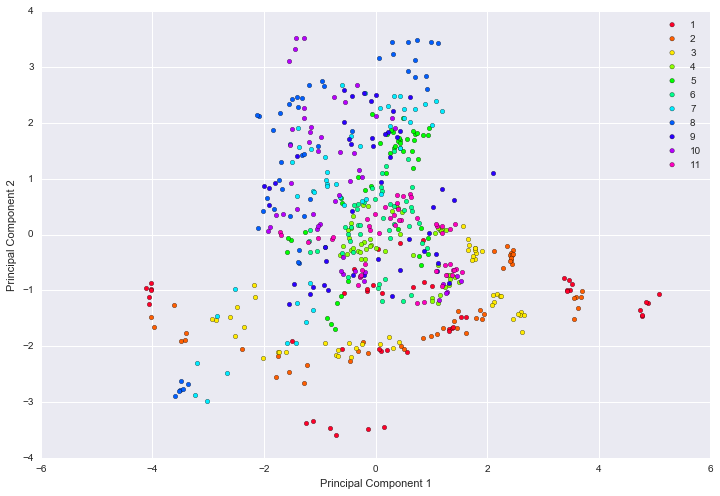

In [9]:
#1.c
%matplotlib inline
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
sklearn_pca = PCA(n_components=2)
Xred_pca = sklearn_pca.fit_transform(X_std)
cmap = plt.cm.get_cmap('gist_rainbow')
mclasses=(1,2,3,4,5,6,7,8,9,10,11)
mcolors = [cmap(i) for i in np.linspace(0,1,11)]
plt.figure(figsize=(12, 8))
for lab, col in zip(mclasses,mcolors):
    plt.scatter(Xred_pca[y==lab, 0],Xred_pca[y==lab, 1],label=lab,c=col)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
leg = plt.legend(loc='upper right', fancybox=True)
plt.show()

Al visualizar las 11 clases se obtiene el gráfico anterior, pero por simplicidad y mejor visualización se utiliza uno con 9 de las 11 etiquetas:

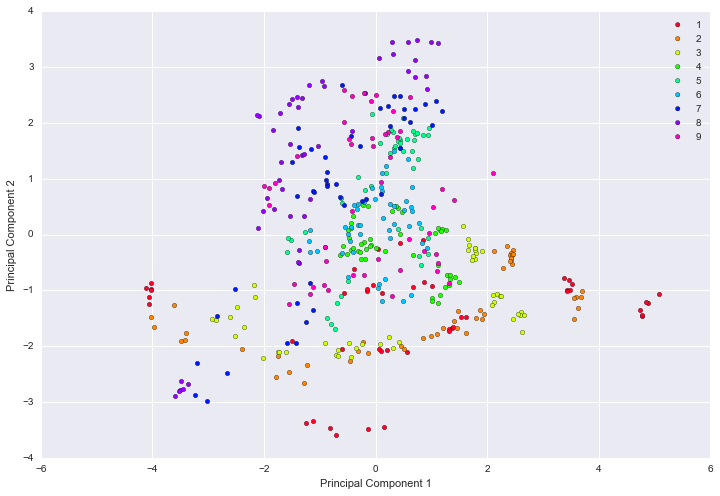

In [10]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
sklearn_pca = PCA(n_components=2)
Xred_pca = sklearn_pca.fit_transform(X_std)
cmap = plt.cm.get_cmap('gist_rainbow')
mclasses=(1,2,3,4,5,6,7,8,9)
mcolors = [cmap(i) for i in np.linspace(0,1,9)]
plt.figure(figsize=(12, 8))
for lab, col in zip(mclasses,mcolors):
    plt.scatter(Xred_pca[y==lab, 0],Xred_pca[y==lab, 1],label=lab,c=col)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
leg = plt.legend(loc='upper right', fancybox=True)
plt.show()

### 2.1.d. Representación con LDA

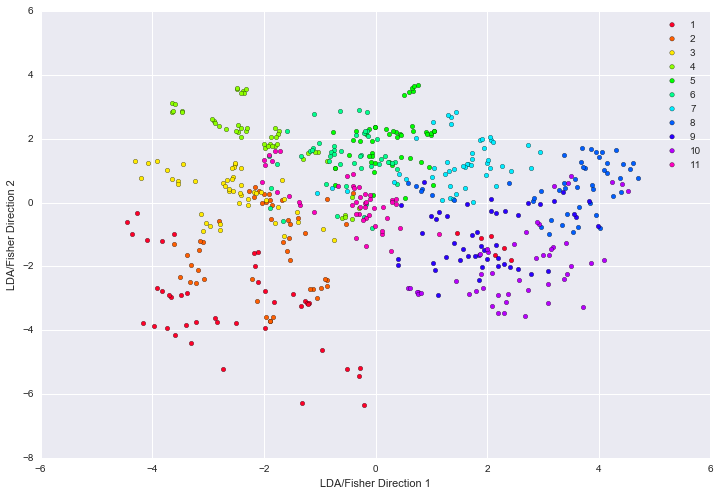

In [12]:
#1.d
%matplotlib inline
from sklearn.lda import LDA
sklearn_lda = LDA(n_components=2)
Xred_lda = sklearn_lda.fit_transform(X_std,y)
cmap = plt.cm.get_cmap('gist_rainbow')
mclasses=(1,2,3,4,5,6,7,8,9,10,11)
mcolors = [cmap(i) for i in np.linspace(0,1,11)]
plt.figure(figsize=(12, 8))
for lab, col in zip(mclasses,mcolors):
    plt.scatter(Xred_lda[y==lab, 0],Xred_lda[y==lab, 1],label=lab,c=col)
plt.xlabel('LDA/Fisher Direction 1')
plt.ylabel('LDA/Fisher Direction 2')
leg = plt.legend(loc='upper right', fancybox=True)
plt.show()


Al igual que en el caso anterior, por simplicidad se grafican las primeras 9 etiquetas de las 11 que representan las vocales, con lo que se pasa del gráfico anterior al siguiente:

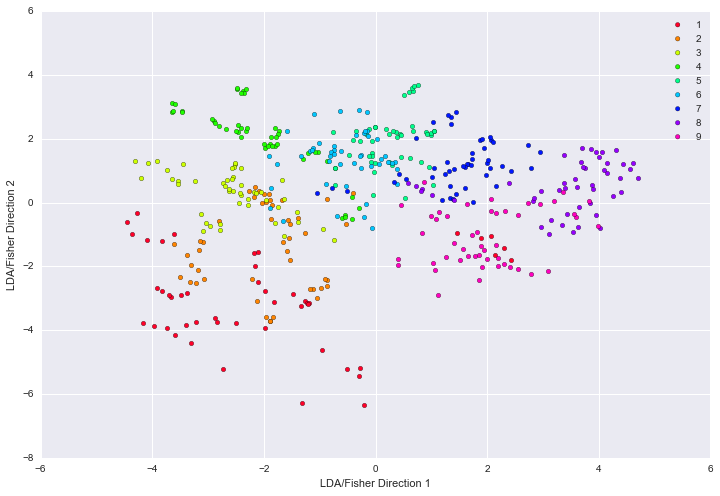

In [13]:
%matplotlib inline
from sklearn.lda import LDA
sklearn_lda = LDA(n_components=2)
Xred_lda = sklearn_lda.fit_transform(X_std,y)
cmap = plt.cm.get_cmap('gist_rainbow')
mclasses=(1,2,3,4,5,6,7,8,9)
mcolors = [cmap(i) for i in np.linspace(0,1,9)]
plt.figure(figsize=(12, 8))
for lab, col in zip(mclasses,mcolors):
    plt.scatter(Xred_lda[y==lab, 0],Xred_lda[y==lab, 1],label=lab,c=col)
plt.xlabel('LDA/Fisher Direction 1')
plt.ylabel('LDA/Fisher Direction 2')
leg = plt.legend(loc='upper right', fancybox=True)
plt.show()

### 2.1.e. Comparación cualitativa de PCA y LDA

Como puede apreciarse en ambos gráficos de PCA, su representación de los datos no obtiene una división o agrupación clara de estos. En cambio en ambos gráficos de LDA se observa un mayor orden o cercanía entre clases del mismo tipo, casi pudiéndose distinguir visualmente.
Debemos recordar que LDA considera las etiquetas de las clases para calcular los vectores que maximizan la separación entre ellas. Por otro lado, PCA se opta por las direcciones que maximicen la variabilidad sin considerar la clase de cada dato. Por lo que se puede decir que, un método para elegir una técnica de reducción es usar LDA para reducción de dimensionalidad cuando se tienen datos con etiquetas y PCA en otro caso.


### 2.1.f. Construcción de clasificador que trabaje solamente a base de probabilidad.

In [14]:
#1.f
probas = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

for index, row in train_df.iterrows():
    if row['y']==1:
        probas[0]=probas[0]+1.0
    if row['y']==2:
        probas[1]=probas[1]+1.0
    if row['y']==3:  
        probas[2]=probas[2]+1.0
    if row['y']==4:  
        probas[3]=probas[3]+1.0
    if row['y']==5: 
        probas[4]=probas[4]+1.0
    if row['y']==6:  
        probas[5]=probas[5]+1.0
    if row['y']==7:  
        probas[6]=probas[6]+1.0
    if row['y']==8:  
        probas[7]=probas[7]+1.0
    if row['y']==9:
        probas[8]=probas[8]+1.0
    if row['y']==10:
        probas[9]=probas[9]+1.0
    if row['y']==11:
        probas[10]=probas[10]+1.0
        
for i in range(0,11): 
    probas[i]=probas[i]/528.0
    print "Probabilidad Clase %d = %f" %(i+1,probas[i])

yhat_apriori = np.argmax(probas) + 1


print "Clase: %d"%yhat_apriori

Probabilidad Clase 1 = 0.090909
Probabilidad Clase 2 = 0.090909
Probabilidad Clase 3 = 0.090909
Probabilidad Clase 4 = 0.090909
Probabilidad Clase 5 = 0.090909
Probabilidad Clase 6 = 0.090909
Probabilidad Clase 7 = 0.090909
Probabilidad Clase 8 = 0.090909
Probabilidad Clase 9 = 0.090909
Probabilidad Clase 10 = 0.090909
Probabilidad Clase 11 = 0.090909
Clase: 1


Al tener la misma cantidad de datos para cada etiqueta en ambos sets de datos, el clasificador otorga una probabilidad de 0.090909 a cada una de las 11 clases. Este método es especialemente malo, entregando valores de error dificiles de empeorar, pudiendo ser incluso peor teniendo una mayor cantidad de etiquetas. Esto último siempre bajo la premisa de que cada etiqueta tiene la misma cantidad de datos, repartiendo la probabilidad total en más etiquetas, lo que disminuye la probabilidad individual de cada una de ellas.

### 2.1.g. Comparación del desempeño de LDA, QDA y un modelo de Vecinos Más Cercanos (k-NN).

LDA - Conjunto de entrenamiento: 0.683712
LDA - Conjunto de prueba: 0.452381
QDA - Conjunto de entrenamiento: 0.988636
QDA - Conjunto de prueba: 0.415584
KNN - Conjunto de entrenamiento con k=10: 0.931818
KNN - Conjunto de prueba con k=10: 0.491342


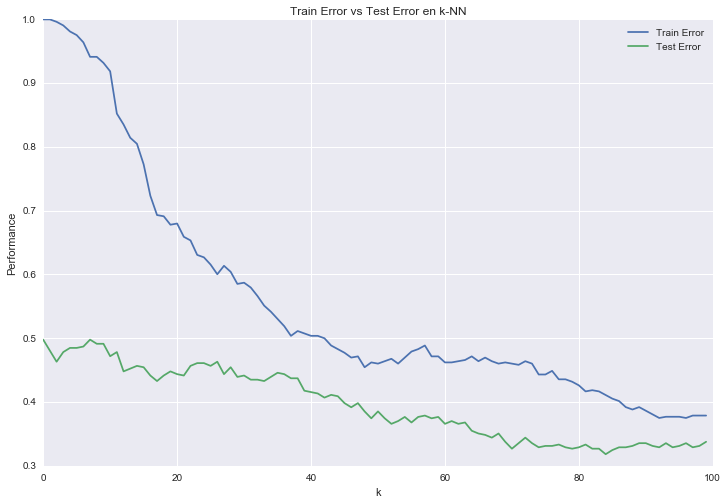

In [16]:
#1.g
import matplotlib.pylab as plt
from sklearn.lda import LDA
from sklearn.qda import QDA
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

Xtest = test_df.ix[:,'x.1':'x.10'].values
ytest = test_df.ix[:,'y'].values
X_std_test = StandardScaler().fit_transform(Xtest)
lda_model = LDA()
lda_model.fit(X_std,y)
print "LDA - Conjunto de entrenamiento: %f"%lda_model.score(X_std,y)
print "LDA - Conjunto de prueba: %f"%lda_model.score(X_std_test,ytest)
qda_model = QDA()
qda_model.fit(X_std,y)
print "QDA - Conjunto de entrenamiento: %f"%qda_model.score(X_std,y)
print "QDA - Conjunto de prueba: %f"%qda_model.score(X_std_test,ytest)
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(X_std,y)
print "KNN - Conjunto de entrenamiento con k=10: %f"%knn_model.score(X_std,y)
print "KNN - Conjunto de prueba con k=10: %f"%knn_model.score(X_std_test,ytest)
knn_train = []
knn_test = []
for i in range(1,101):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_std,y)
    knn_train.append(knn_model.score(X_std,y))
    knn_test.append(knn_model.score(X_std_test,ytest))

plt.figure(figsize=(12, 8))
plt.plot(knn_train, label="Train Error")
plt.plot(knn_test, label="Test Error")

plt.xlabel('k')
plt.ylabel('Performance')
plt.title('Train Error vs Test Error en k-NN')
leg = plt.legend(loc='upper right', fancybox=True)
plt.show()

De los errores se obtenidos, el que mejor se comporta para el set de entrenamiento es QDA con un 0.988636, le sigue un poco más abajo KNN(k=10) con un 0.931818 y por último con un poco aceptable error de entrenamiento se encuentran los 0.683712 de LDA. Sin embargo, como suele ocurrir, al comparar los errores en el set de prueba observamos que el primer lugar es ahora para KNN(k=10) con 0.491342, le sigue LDA con 0.452381 y por último QDA con 0.415584. Se puede notar que el con mejor error de entrenamiento fue el que peor se comportó en el set de pruebas, esto debido al sobreajuste que se genera al ser una técnica más compleja que busca parecerse en demasía a los datos con los que cuenta. Se observa también el caso inverso con LDA que, a pesar de tener el peor error en el conjunto de entrenamiento, logró un valor de error más aceptable que QDA.

Según el gráfico de k-NN y sus distintos valores de k, se observa que, a un mayor valor de k, los errores de entrenamiento y prueba disminuyen. Por lo que la elección del mejor k en este caso sería uno pequeño. 

Este comportamiento puede deberse a que en general cuando se consideran conjuntos de vecinos pequeños se es más fácil tener un parecido fuerte entre los pocos integrantes, esto va disminuyendo a medida que más integrantes se unen al conjunto de vecinos, incorporando además relaciones locales más débiles en desmedro de las más fuertes. La exactitud de este algoritmo puede ser severamente degradada por la presencia de ruido o características irrelevantes.


### 2.1.h. Generación de una representación de la data con PCA entrenando con LDA, QDA y k-NN.

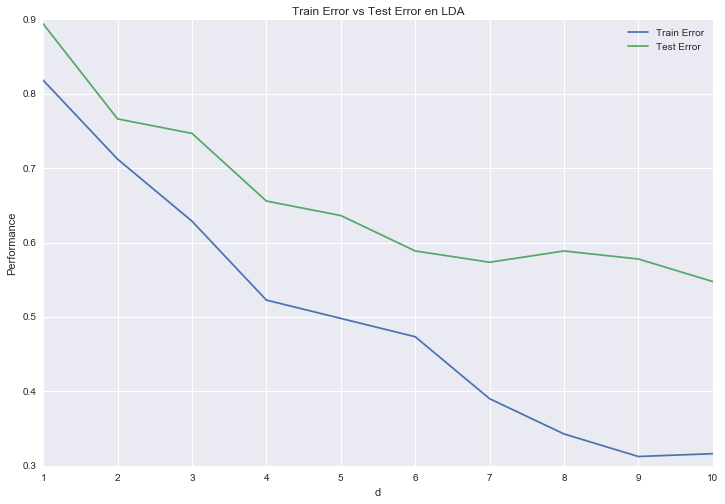

El minimo Test Error para LDA es 0.547619 con d = 10


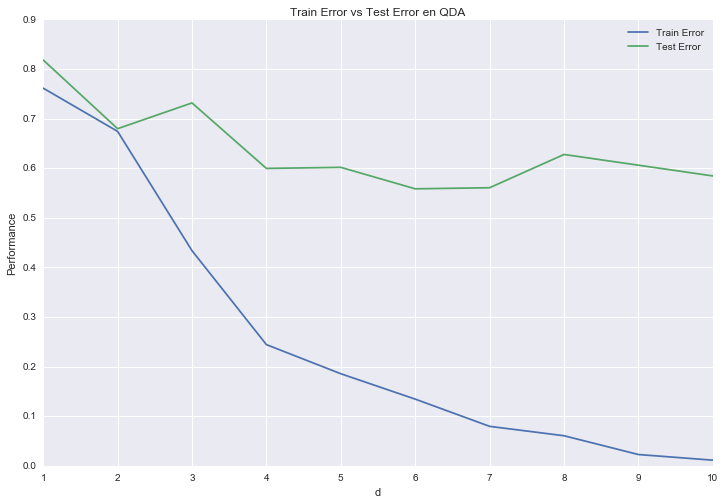

El minimo Test Error para QDA es 0.558442 con d = 6


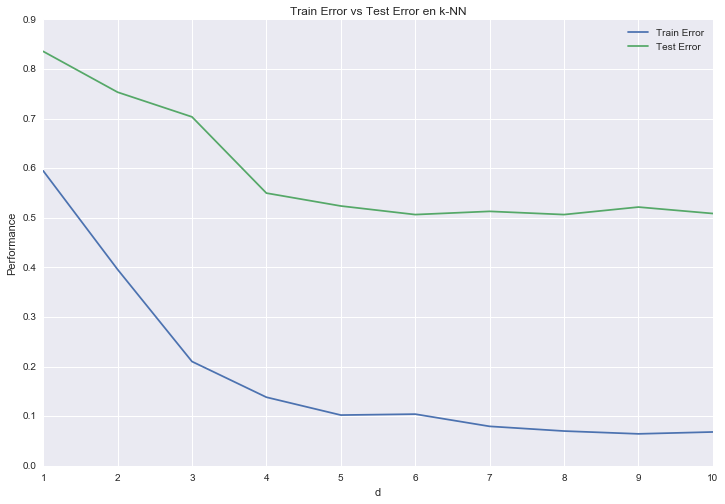

El minimo Test Error para k-NN es 0.506494 con d = 6


In [17]:
#1.h
import matplotlib.pylab as plt
from sklearn.metrics import zero_one_loss
lda_train = []
lda_test = []
qda_train = []
qda_test = []
knn_train = []
knn_test = []

for i in range(1,11):
    sklearn_pca = PCA(n_components=i)
    Xred_pca = sklearn_pca.fit_transform(X_std)
    Xred_pca_test = sklearn_pca.transform(X_std_test)

    lda_model = LDA()
    lda_model.fit(Xred_pca,y)
    yhat_train = lda_model.predict(Xred_pca)
    lda_train.append(zero_one_loss(y, yhat_train)) 
    yhat_test = lda_model.predict(Xred_pca_test)
    lda_test.append(zero_one_loss(ytest, yhat_test)) 

    qda_model = QDA()
    qda_model.fit(Xred_pca,y)
    yhat_train = qda_model.predict(Xred_pca)
    qda_train.append(zero_one_loss(y, yhat_train)) 
    yhat_test = qda_model.predict(Xred_pca_test)
    qda_test.append(zero_one_loss(ytest, yhat_test)) 

    knn_model = KNeighborsClassifier(n_neighbors=10)
    knn_model.fit(Xred_pca,y)
    yhat_train = knn_model.predict(Xred_pca)
    knn_train.append(zero_one_loss(y, yhat_train)) 
    yhat_test = knn_model.predict(Xred_pca_test)
    knn_test.append(zero_one_loss(ytest, yhat_test)) 

plt.figure(figsize=(12, 8))
plt.plot(range(1,len(lda_train)+1),lda_train, label="Train Error")
plt.plot(range(1,len(lda_test)+1),lda_test, label="Test Error")

plt.xlabel('d')
plt.ylabel('Performance')
plt.title('Train Error vs Test Error en LDA')
leg = plt.legend(loc='upper right', fancybox=True)
plt.show()
print "El minimo Test Error para LDA es %f con d = %d"%(min(lda_test),lda_test.index(min(lda_test))+1)

plt.figure(figsize=(12, 8))
plt.plot(range(1,len(qda_train)+1),qda_train, label="Train Error")
plt.plot(range(1,len(qda_test)+1),qda_test, label="Test Error")

plt.xlabel('d')
plt.ylabel('Performance')
plt.title('Train Error vs Test Error en QDA')
leg = plt.legend(loc='upper right', fancybox=True)
plt.show()
print "El minimo Test Error para QDA es %f con d = %d"%(min(qda_test),qda_test.index(min(qda_test))+1)

plt.figure(figsize=(12, 8))
plt.plot(range(1,len(knn_train)+1),knn_train, label="Train Error")
plt.plot(range(1,len(knn_test)+1),knn_test, label="Test Error")

plt.xlabel('d')
plt.ylabel('Performance')
plt.title('Train Error vs Test Error en k-NN')
leg = plt.legend(loc='upper right', fancybox=True)
plt.show()
print "El minimo Test Error para k-NN es %f con d = %d"%(min(knn_test),knn_test.index(min(knn_test))+1)

Se observa en los tres gráficos de los tres métodos que al reducir dimensionalidad con PCA el error de entrenamiento disminuye por cada incorporación de una componente. Además se da que en los tres casos el error de entrenamiento es menor que para cada valor de dimensionalidad. Esto debido a que para calcular estos errores se utilizan los mismos datos con los que se construye el modelo, por lo que la probabilidad de que ocurra es muy alta. 

Por último, se puede apreciar que los valores de dimensión en los cuales los métodos alcanzan su mínimo error de prueba son: 10 para LDA (0.547619), 6 para QDA (0.558442) y 6 para k-NN (0.506494). Si se comparan con los valores obtenidos sin realizar PCA, se puede observar una leve mejoría en la mayoría de los casos, pero no significantes.

### 2.1.i. Generación de una representación de la data con LDA entrenando con LDA, QDA y k-NN.

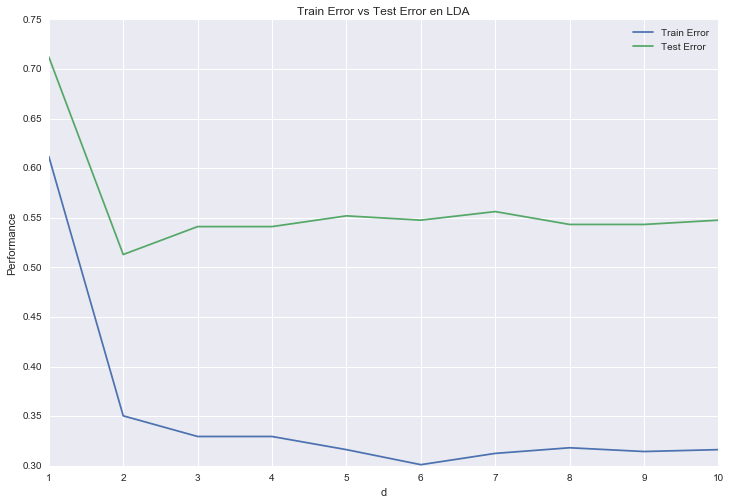

El minimo Test Error para LDA es 0.512987 con d = 2


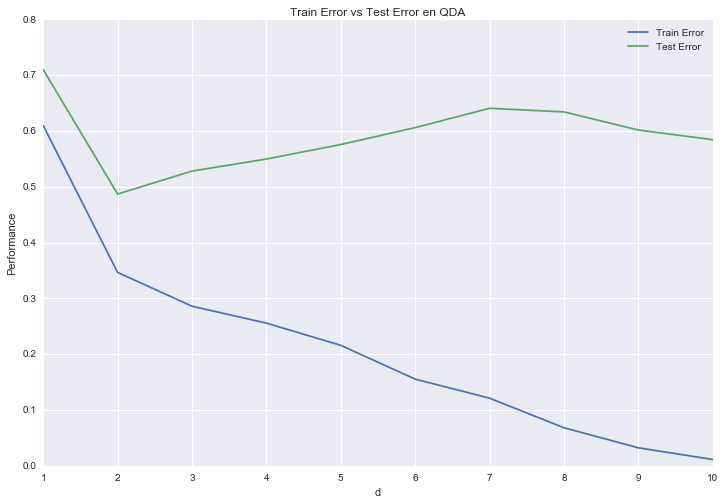

El minimo Test Error para QDA es 0.487013 con d = 2


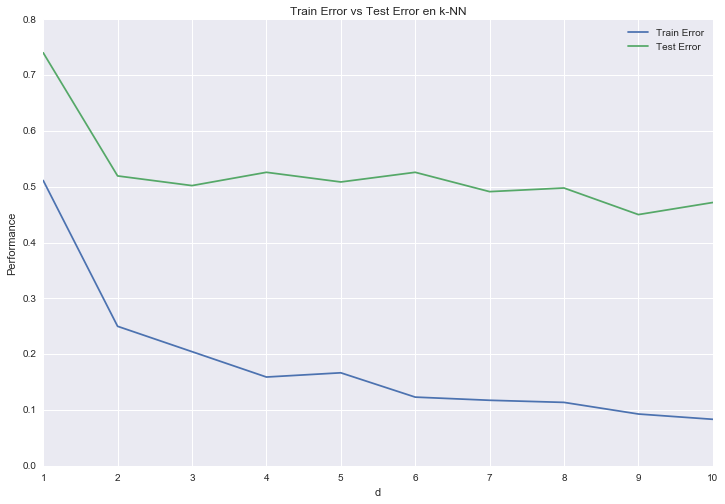

El minimo Test Error para k-NN es 0.450216 con d = 9


In [18]:
#1.i
import matplotlib.pylab as plt
from sklearn.metrics import zero_one_loss
%matplotlib inline

lda_train = []
lda_test = []
qda_train = []
qda_test = []
knn_train = []
knn_test = []

lda_model = LDA()
qda_model = QDA()
knn_model = KNeighborsClassifier(n_neighbors=10)

for i in range(1,11):
    sklearn_lda = LDA(n_components=i)
    Xred_pca = sklearn_lda.fit_transform(X_std, y)
    Xred_pca_test = sklearn_lda.transform(X_std_test)
    lda_model.fit(Xred_pca,y)
    qda_model.fit(Xred_pca,y)
    knn_model.fit(Xred_pca,y)

    yhat_train = lda_model.predict(Xred_pca)
    lda_train.append(zero_one_loss(y, yhat_train)) 
    yhat_test = lda_model.predict(Xred_pca_test)
    lda_test.append(zero_one_loss(ytest, yhat_test)) 

    yhat_train = qda_model.predict(Xred_pca)
    qda_train.append(zero_one_loss(y, yhat_train)) 
    yhat_test = qda_model.predict(Xred_pca_test)
    qda_test.append(zero_one_loss(ytest, yhat_test)) 

    yhat_train = knn_model.predict(Xred_pca)
    knn_train.append(zero_one_loss(y, yhat_train)) 
    yhat_test = knn_model.predict(Xred_pca_test)
    knn_test.append(zero_one_loss(ytest, yhat_test)) 

plt.figure(figsize=(12, 8))
plt.plot(range(1,len(lda_train)+1),lda_train, label="Train Error")
plt.plot(range(1,len(lda_test)+1),lda_test, label="Test Error")

plt.xlabel('d')
plt.ylabel('Performance')
plt.title('Train Error vs Test Error en LDA')
leg = plt.legend(loc='upper right', fancybox=True)
plt.show()

print "El minimo Test Error para LDA es %f con d = %d"%(min(lda_test),lda_test.index(min(lda_test))+1)

plt.figure(figsize=(12, 8))
plt.plot(range(1,len(qda_train)+1),qda_train, label="Train Error")
plt.plot(range(1,len(qda_test)+1),qda_test, label="Test Error")

plt.xlabel('d')
plt.ylabel('Performance')
plt.title('Train Error vs Test Error en QDA')
leg = plt.legend(loc='upper right', fancybox=True)
plt.show()

print "El minimo Test Error para QDA es %f con d = %d"%(min(qda_test),qda_test.index(min(qda_test))+1)

plt.figure(figsize=(12, 8))
plt.plot(range(1,len(knn_train)+1),knn_train, label="Train Error")
plt.plot(range(1,len(knn_test)+1),knn_test, label="Test Error")

plt.xlabel('d')
plt.ylabel('Performance')
plt.title('Train Error vs Test Error en k-NN')
leg = plt.legend(loc='upper right', fancybox=True)
plt.show()
print "El minimo Test Error para k-NN es %f con d = %d"%(min(knn_test),knn_test.index(min(knn_test))+1)

Al igual que en el caso anterior, se observa en los tres gráficos de los tres métodos que el error de entrenamiento por lo general disminuye por cada incorporación de una componente. Además se da también que en los tres casos el error de entrenamiento es menor que para cada valor de dimensionalidad a causa de la utilización de los mismos datos para entrenar y medir

Por último, se puede apreciar que los valores de dimensión en los cuales los métodos alcanzan su mínimo error de prueba son: 2 para LDA (0.512987), 2 para QDA (0.487013) y 9 para k-NN (0.450216). Al comparar estos valores con los sin haber realizado LDA se puede dar cuenta de que los valores de error son bastantes cercanos, pero estos se consiguen en la mayoría de los casos con un valor muy bajo de componentes obteniendo un modelo simple, por lo que es una buena opción en terminos de disminuir complejidad y cómputo.

Comparando los resultados de PCA y LDA, se confirma que LDA es una buen método para disminuir dimensionalidad en problemas con etiquetas conocidas a diferencia de PCA.